In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,  confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB

from sklearn.feature_selection import SelectFromModel
warnings.filterwarnings('ignore')

In [2]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
         'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
df = pd.read_csv('cleaned_train_data.csv', dtype=dtypes)

In [26]:
from sklearn.preprocessing import LabelEncoder
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

df = dummyEncode(df)

In [5]:
y = df['HasDetections']
X = df.drop(columns=['HasDetections','MachineIdentifier'])

X.replace([np.inf, -np.inf], np.finfo(np.float32).min, inplace=True)
# replacing infinity values if any in a dataset to minimum float32 
#value because applied log transformation on one feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)



In [6]:
feat_labels = list(X_test.head(0))
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
fitt = forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) ProductName                    0.067717
 2) EngineVersion                  0.056900
 3) AppVersion                     0.056822
 4) AvSigVersion                   0.055626
 5) IsBeta                         0.052032
 6) RtpStateBitfield               0.046981
 7) IsSxsPassiveMode               0.044584
 8) AVProductStatesIdentifier      0.036095
 9) AVProductsInstalled            0.030106
10) AVProductsEnabled              0.029285
11) HasTpm                         0.028224
12) CountryIdentifier              0.026379
13) CityIdentifier                 0.026354
14) OrganizationIdentifier         0.023541
15) GeoNameIdentifier              0.022873
16) LocaleEnglishNameIdentifier    0.021844
17) Platform                       0.021615
18) Processor                      0.021336
19) OsVer                          0.019661
20) OsBuild                        0.019393
21) OsSuite                        0.019196
22) OsPlatformSubRelease           0.019152
23) OsBuildLab                  

In [7]:
sfm = SelectFromModel(forest, threshold=0.01) 
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                threshold=0.01)

In [8]:
X_train_ = sfm.transform(X_train)
X_test_ = sfm.transform(X_test)
shape = np.shape(X_train_)
print("Shape of the dataset ",shape)


Shape of the dataset  (3277817, 32)


In [9]:
importances = forest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

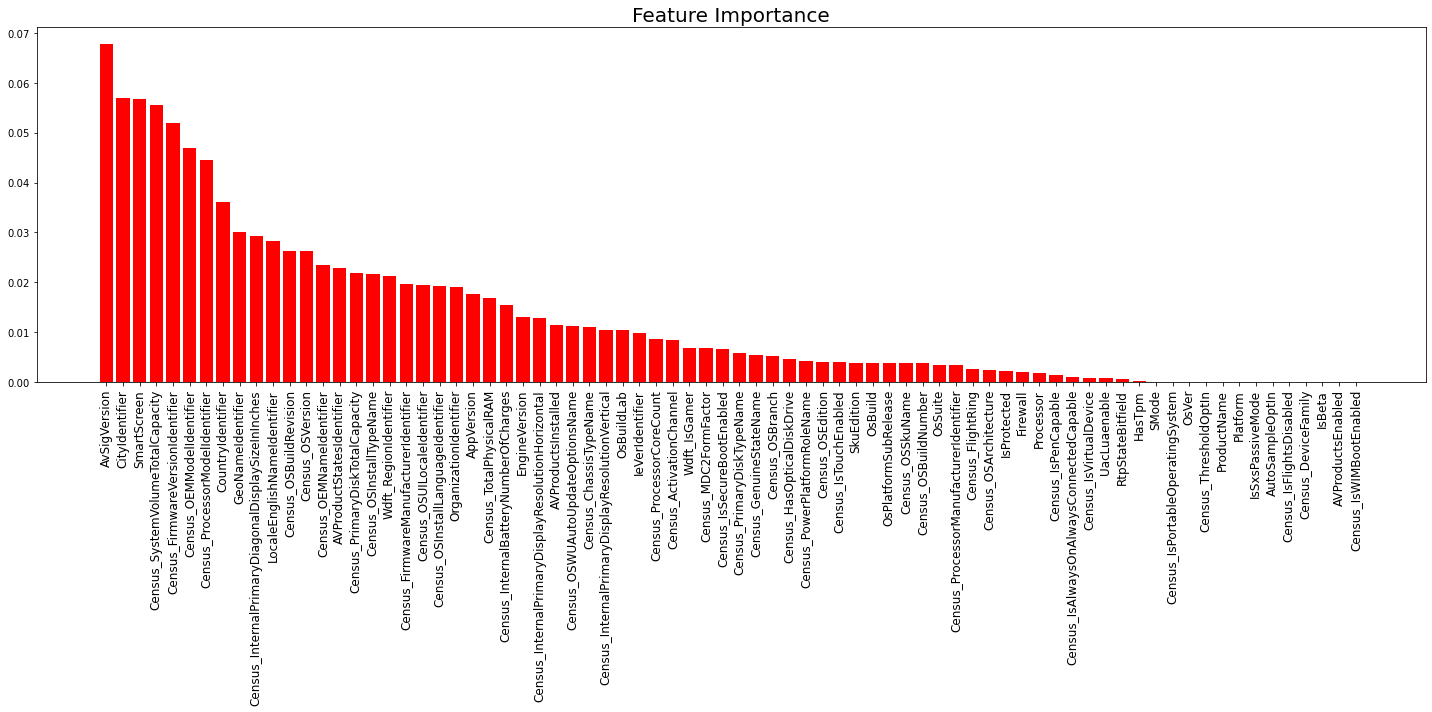

In [10]:
plt.rcParams["figure.figsize"] = (20, 10)


plt.title('Feature Importance',fontsize=20)
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center', color='r')

plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90,fontsize=12)
plt.tight_layout()

plt.show()

In [11]:
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.fit_transform(X_test_)

In [12]:
clf_lr = LogisticRegression(random_state=0)

clf_rf = RandomForestClassifier(n_estimators=80, min_samples_split=12)

clf_dt = DecisionTreeClassifier(max_depth=10, random_state=None)

clf_nb = ComplementNB()

clf_labels = ['Logistic Regression', 'Random Forrest', 'Decision Tree', 'ComplementNB']

In [13]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
def auc_curve(X_test, y_test, model, y_pred, label):
    
    
    model_prob = model.predict_proba(X_test)
    model_prob = model_prob[:, 1] #keep probabilites for only positive outcomes

    model_precision, model_recall, _ = precision_recall_curve(y_test, model_prob)
    pr_auc = average_precision_score(y_test, model_prob, average='weighted')
    roc_auc = roc_auc_score(y_test, model_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    model_f1, model_auc = f1_score(y_test, y_pred), auc(model_recall, model_precision)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
    
    
    ax1.plot(model_recall, model_precision, label='auc={}'.format(pr_auc))
    ax1.set_title(label+' | Precision / Recall Curve', fontsize=15)
    ax1.set_xlabel('Recall', fontsize=15)
    ax1.set_ylabel('Precision', fontsize=15)
    ax1.legend(loc='lower right')

    # plot ROC curve
    ax2.plot(fpr, tpr, 'orange', label='auc={}'.format(roc_auc))
    ax2.set_title('ROC Curve', fontsize=15)
    ax2.set_ylabel('True Positive Rate', fontsize=15)
    ax2.set_xlabel("False Positive Rate", fontsize=15)
    ax2.legend(loc='lower right')

    print('Average PR AUC Score {}'.format(pr_auc))
   
    
def Confusion_matrix(y_test, y_pred, Label):
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
                    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g', linewidths=1); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('top') 
    ax.xaxis.set_ticklabels(['0', '1'], fontsize = 15)
    ax.xaxis.tick_top()

    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(['0', '1'], fontsize = 15)
    plt.show()
    

In [15]:
def logistic_regression():
    
    label='Logistic Regression'
    y_pred_1 = clf_1.fit(X_train, y_train).predict(X_test)

    Confusion_matrix(y_test, y_pred_1, label)
    clf_report = classification_report(y_test, y_pred_1)
    print(f'Classification report for {label}')
    print(clf_report) 
    auc_curve(X_test, y_test, clf_1, y_pred_1, label)
    
def random_forrest():
    label='Random Forrest'
    y_pred_2 = clf_2.fit(X_train, y_train).predict(X_test)

    Confusion_matrix(y_test, y_pred_2, label)
    
    clf_report = classification_report(y_test, y_pred_2)
    print(f'Classification report for {label}')
    print(clf_report)
    auc_curve(X_test, y_test, clf_2, y_pred_2, label)
    
def decision_tree():
    label='Decision Tree'
    y_pred_3 = clf_3.fit(X_train, y_train).predict(X_test)

    Confusion_matrix(y_test, y_pred_3, label)
    
    clf_report = classification_report(y_test, y_pred_3)
    print(f'Classification report for {label}')
    print(clf_report)
    auc_curve(X_test, y_test, clf_3, y_pred_3, label)
    
def complementNB():
    label='ComplementNB'
    y_pred_4 = clf_4.fit(X_train, y_train).predict(X_test)

    Confusion_matrix(y_test, y_pred_4, label)
    classification_report(y_test, y_pred_4)
    
    clf_report = classification_report(y_test, y_pred_4)
    print(f'Classification report for {label}')
    print(clf_report)
    auc_curve(X_test, y_test, clf_4, y_pred_4, label)
    
def mv_classifier():
    mv_clf = MajorityVoteClassifier(
                classifiers=[clf_1, clf_2, clf_3, clf_4])
    
    label='Majority Vote Classifier'
    y_pred_mv = mv_clf.fit(X_train, y_train).predict(X_test)

    Confusion_matrix(y_test, y_pred_mv, label)
    classification_report(y_test, y_pred_mv)
    
    clf_report = classification_report(y_test, y_pred_mv)
    print(f'Classification report for {label}')
    print(clf_report)
    auc_curve(X_test, y_test, mv_clf, y_pred_mv, label)
    


X_train = X_train_
X_test = X_test_

mv_clf = MajorityVoteClassifier(
                classifiers=[clf_lr, clf_rf, clf_dt, clf_nb])
clf_labels_ = ['Logistic Regression','Random Forrest', 'Decision tree', 'ComplementNB', 'Majority voting']

clf_labels_ += ['Majority Voting']
all_clf = [clf_lr, clf_rf, clf_dt, clf_nb, mv_clf]
print('Scores with 10 fold cross validation')
for clf, label in zip(all_clf, clf_labels_):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='roc_auc')
    
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    
    Confusion_matrix(y_test, y_pred, label)
    print(classification_report(y_test, y_pred))
    
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

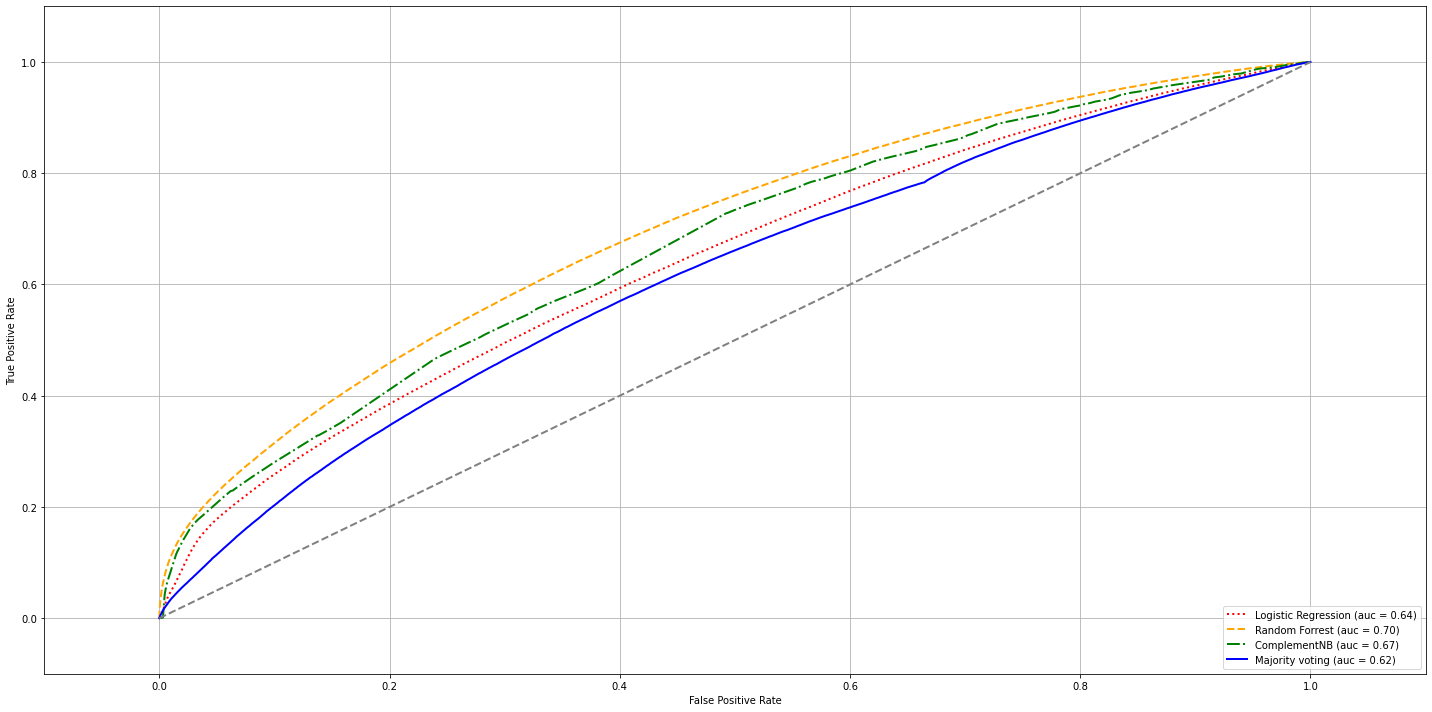

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colours = ['red', 'orange', 'green', 'blue']
linestyles = [':', '--', '-.', '-']
clf_labels = ['Logistic Regression', 'Random Forrest', 'ComplementNB','Majority voting']


mv_clf = MajorityVoteClassifier(
                classifiers=[clf_lr, clf_rf, clf_dt, clf_nb])

combined_clf = [clf_lr, clf_rf, clf_dt, clf_nb]

for clf, label, clr, ls \
        in zip(combined_clf, clf_labels, colours, linestyles):
   
    y_pred = clf.fit(X_train_, y_train).predict_proba(X_test_)[:,1]
    
    fpr,tpr,thresholds = roc_curve(y_true=y_test, 
                          y_score=y_pred)
    
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, 
             color=clr, 
             linestyle=ls, 
             linewidth=2,
             label='%s (auc = %0.2f)' % (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 
         linestyle='--', 
         color='gray', 
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.tight_layout()

plt.show()

In [17]:
NN_clf = tf.keras.models.Sequential([

                tf.keras.layers.Flatten(input_shape=(32,)), #input, value set by feature selection 
                tf.keras.layers.Dense(72, activation='relu'), #Hidden layer
                tf.keras.layers.Dropout(0.2), #dropou
                tf.keras.layers.Dense(2, activation='sigmoid') #Layer changes depending on amount of target variables
                ])

NN_clf.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [19]:
NN_clf.fit(X_train_, y_train, epochs=50, batch_size=1000)
y_pred = NN_clf.predict_proba(X_test_)[:,1]
        
X_classes = NN_clf.predict_classes(X_test_, verbose=0)
#accuracy = accuracy_score(y_test, X_classes)
fpr,tpr,thresholds = roc_curve(y_true=y_test, 
                          y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)

Epoch 1/50
3278/3278 [==============================] - 4s 1ms/step - loss: 0.6518 - accuracy: 0.6047
Epoch 2/50
3278/3278 [==============================] - 4s 1ms/step - loss: 0.6444 - accuracy: 0.6165
Epoch 3/50
3278/3278 [==============================] - 4s 1ms/step - loss: 0.6421 - accuracy: 0.6192
Epoch 4/50
3278/3278 [==============================] - 4s 1ms/step - loss: 0.6406 - accuracy: 0.6213
Epoch 5/50
3278/3278 [==============================] - 4s 1ms/step - loss: 0.6394 - accuracy: 0.6226
Epoch 6/50
3278/3278 [==============================] - 4s 1ms/step - loss: 0.6386 - accuracy: 0.6233
Epoch 7/50
3278/3278 [==============================] - 5s 1ms/step - loss: 0.6380 - accuracy: 0.6238
Epoch 8/50
3278/3278 [==============================] - 5s 1ms/step - loss: 0.6374 - accuracy: 0.6246
Epoch 9/50
3278/3278 [==============================] - 5s 1ms/step - loss: 0.6371 - accuracy: 0.6248
Epoch 10/50
3278/3278 [==============================] - 5s 1ms/step - loss: 0.636

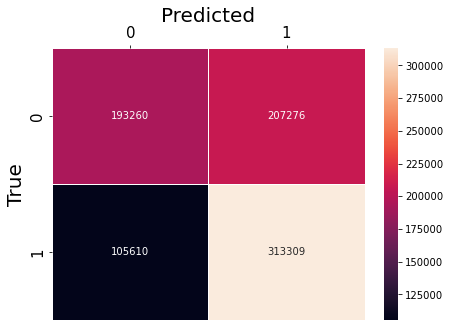

Classification report for Feed forward neural network
              precision    recall  f1-score   support

           0       0.65      0.48      0.55    400536
           1       0.60      0.75      0.67    418919

    accuracy                           0.62    819455
   macro avg       0.62      0.62      0.61    819455
weighted avg       0.62      0.62      0.61    819455

ROC AUC: 0.60 (+/- 0.00) [Neural network]
Average PR AUC Score 0.6360158375938367


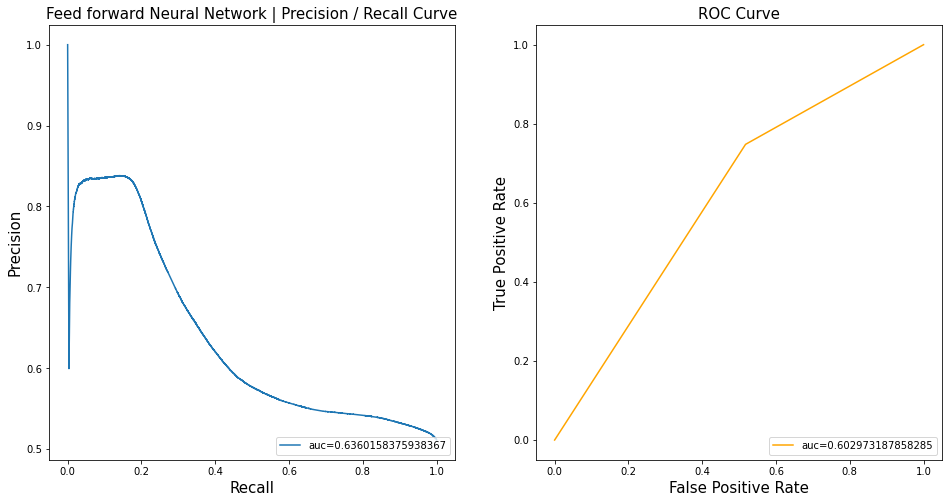

In [30]:
plt.rcParams["figure.figsize"] = (7, 5)
cnf_mat = Confusion_matrix(y_test, X_classes, 'Neural Network')
print("Classification report for Feed forward neural network")
print(classification_report(y_test, X_classes))
print(f"ROC AUC: %0.2f (+/- 0.00) [Neural network]"
     % (roc_auc))
               

auc_ = auc_curve(X_test_, y_test, NN_clf, X_classes, 'Feed forward Neural Network')